In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Create a .CSV of information

In [89]:
raw_data = {
                ' ': ['Los Angeles', 
                      '', 
                      '', 
                      '', 
                      '', 
                      'New York', 
                      '',
                      '',
                      '',],
                '': ['Regular', 
                     'Plus', 
                     'Premium', 
                     'Diesel', 
                     '', 
                     'Regular', 
                     'Plus', 
                     'Premium', 
                     'Diesel',],
                'BP ARCO': [3.53,3.73,3.83,'','',2.82,3.02,3.22,''],
                'Chevron': [3.79,3.89,3.99,3.59,'',2.56,'',3.00,''],
                'Exxon Mobil': [3.89, 3.99,4.09, 3.99,'',2.69,3.03,3.13,''],
                'Costco': [3.39,'',3.59,'','',2.57,'',2.83,''],
                'Shell': [3.69, 3.89, 3.99, 4.09,'',2.79,3.33,3.57,''],
                '76': [3.99,4.19,4.39,4.29,'',2.66,3.00,3.10,''],
            }

In [90]:
df = pd.DataFrame(raw_data, columns = [' ',
                                       '',
                                       'BP ARCO',
                                       'Chevron',
                                       'Exxon Mobil',
                                       'Costco',
                                       'Shell',
                                       '76'])

In [91]:
df.to_csv('gas.csv', index=False)

***

### 2. Importing and Cleaning:
- Import .csv from github
- Add names to empty column headers
- Fill in City NaNs with New York and Los Angeles
- Drop row 5 of dataframe containing all NaN whitespace 
- Melt dataframe creating new variable 'Gas Station', containing the names of the gas stations and the price for each gas type

In [664]:
# import csv file from Github
df = pd.read_csv('https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/gas.csv')
df

,,Unnamed: 1,BP ARCO,Chevron,Exxon Mobil,Costco,Shell,76
0,Los Angeles,Regular,3.53,3.79,3.89,3.39,3.69,3.99
1,NaN,Plus,3.73,3.89,3.99,NaN,3.89,4.19
2,NaN,Premium,3.83,3.99,4.09,3.59,3.99,4.39
3,NaN,Diesel,NaN,3.59,3.99,NaN,4.09,4.29
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,New York,Regular,2.82,2.56,2.69,2.57,2.79,2.66
6,NaN,Plus,3.02,NaN,3.03,NaN,3.33,3.00
7,NaN,Premium,3.22,3.00,3.13,2.83,3.57,3.10
8,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN


In [665]:
#drop the 5 row of dataframe
df.dropna(how = 'all',
          inplace = True)
df

,,Unnamed: 1,BP ARCO,Chevron,Exxon Mobil,Costco,Shell,76
0,Los Angeles,Regular,3.53,3.79,3.89,3.39,3.69,3.99
1,NaN,Plus,3.73,3.89,3.99,NaN,3.89,4.19
2,NaN,Premium,3.83,3.99,4.09,3.59,3.99,4.39
3,NaN,Diesel,NaN,3.59,3.99,NaN,4.09,4.29
5,New York,Regular,2.82,2.56,2.69,2.57,2.79,2.66
6,NaN,Plus,3.02,NaN,3.03,NaN,3.33,3.00
7,NaN,Premium,3.22,3.00,3.13,2.83,3.57,3.10
8,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN


In [666]:
# list all columns of DataFrame
list(df.columns)

[' ',
 'Unnamed: 1',
 'BP ARCO',
 'Chevron',
 'Exxon Mobil',
 'Costco',
 'Shell',
 '76']

In [667]:
df.columns = ['City', 
              'Gas_Type',
              'BP_ARCO',
              'Chevron',
              'Exxon_Mobil',
              'Costco',
              'Shell',
              '76']

list(df.columns)

['City',
 'Gas_Type',
 'BP_ARCO',
 'Chevron',
 'Exxon_Mobil',
 'Costco',
 'Shell',
 '76']

In [668]:
# Insert Los Angeles AND New York in all Nan locations in City Column where they belong
df['City'].fillna(method='ffill', 
                  inplace=True)
df

,City,Gas_Type,BP_ARCO,Chevron,Exxon_Mobil,Costco,Shell,76
0,Los Angeles,Regular,3.53,3.79,3.89,3.39,3.69,3.99
1,Los Angeles,Plus,3.73,3.89,3.99,NaN,3.89,4.19
2,Los Angeles,Premium,3.83,3.99,4.09,3.59,3.99,4.39
3,Los Angeles,Diesel,NaN,3.59,3.99,NaN,4.09,4.29
5,New York,Regular,2.82,2.56,2.69,2.57,2.79,2.66
6,New York,Plus,3.02,NaN,3.03,NaN,3.33,3.00
7,New York,Premium,3.22,3.00,3.13,2.83,3.57,3.10
8,New York,Diesel,NaN,NaN,NaN,NaN,NaN,NaN


In [669]:
# Melt dataframe, creating a new city column placing city names in appropriate locations
df = pd.melt(df, 
             id_vars=["City", "Gas_Type"], 
             var_name="Gas_Station", 
             value_name = "Price")

In [670]:
df.sort_values(by = ['City',
                     'Gas_Station', 
                     'Gas_Type'],
               inplace = True)

In [671]:
df = df[['City', 'Gas_Station', 'Gas_Type', 'Price']]


In [687]:
# drop Nan values from dataframe, since we are planning on taking averages and the need to remvoe these rows in order not to account for them 
df = df.dropna()
df

,City,Gas_Station,Gas_Type,Price
43,Los Angeles,76,Diesel,4.29
41,Los Angeles,76,Plus,4.19
42,Los Angeles,76,Premium,4.39
40,Los Angeles,76,Regular,3.99
1,Los Angeles,BP_ARCO,Plus,3.73
2,Los Angeles,BP_ARCO,Premium,3.83
0,Los Angeles,BP_ARCO,Regular,3.53
11,Los Angeles,Chevron,Diesel,3.59
9,Los Angeles,Chevron,Plus,3.89
10,Los Angeles,Chevron,Premium,3.99


### 3. Compare the different Gas Type prices for each station:

***
This summer I have decided to go on a trip to Los Angeles. I have heard that the gas prices can get pretty out of control in Los Angeles and I want to make sure I can get the best price for my gas.
***

In [628]:
# Create dataframe using only Gas Staions in LA
LA = df[df['City']=='Los Angeles'][['Gas_Station', 'Gas_Type','Price']]
LA = LA.dropna().set_index('Gas_Station')

***
I usually only use Regular gas for my car, therefore I only need to compare prices for regular gas.
***

In [635]:
regular_LA = LA.loc[LA['Gas_Type'] == 'Regular']
regular_LA = regular.sort_values(by = 'Price')
#regular

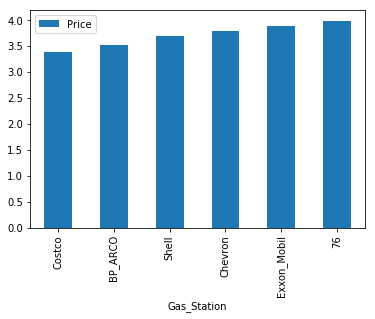

In [636]:
regular_LA.plot.bar()

- It seems that my best option would be to get my gas at Costco during my trip.

***

### For each city, which stations' average prices are below the mean?

In [645]:
# new column with Avg Price of gas for each 
station_mean['Avg_Price'] = df.groupby(['City','Gas_Station']).mean().round(2)
#station_mean

In [646]:
# Mean price of gas of each city
city_mean = station_mean.groupby('City').mean().round(2)

In [655]:
# All stations in NY whose regular gas type is bellow New York City average
ny_mean = city_mean.loc[['New York']].mean()
ny_bellow = station_mean[(station_mean <= ny_mean)]
ny_bellow = ny_bellow.dropna().loc[['New York']]
ny_bellow

Avg_Price
City     Gas_Station           
New York 76                2.92
         Chevron           2.78
         Costco            2.70

In [656]:
# All stations in LA whose regular gas type is bellow Los Angeles average
la_mean = city_mean.loc[['Los Angeles']].mean()
la_bellow = station_mean[(station_mean <= la_mean)]
la_bellow = la_bellow.dropna().loc[['Los Angeles']]
la_bellow

Avg_Price
City        Gas_Station           
Los Angeles BP_ARCO           3.70
            Chevron           3.82
            Costco            3.49

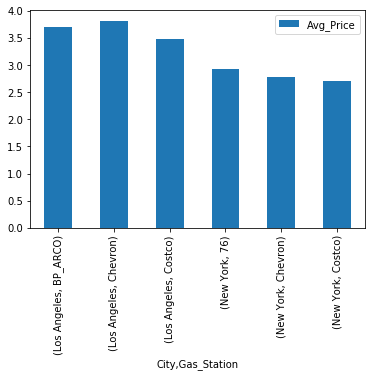

In [683]:
#bigdata = data1.append(data2, ignore_index=True)
df_join = la_bellow.append(ny_bellow)
df_join.plot.bar()

### 4.

If I were to transform this data back into wide format I would place the different types of gas as the column heads and the gas station names in place of the gas types. In doing so it is easier to compare different gas type prices for each gas station, since you can simply look down that column of gas type.